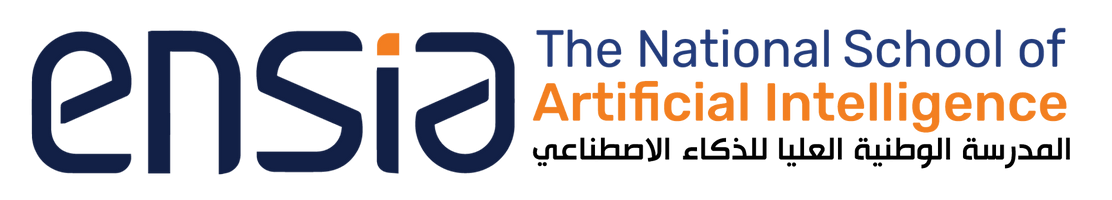

---
# **Introduction to Artificial Intelligence**

> ## Project 10 --Athlete performance and injury prediction , with finding an optimal training schedule--
*Problem Formulation , Uninformed Search and CSP*

## Overview:
>The aim of this lab is to implement the graph search general procedure outlined in Algorithm 1. The idea is to have a powerful general algorithm able to receive a problem and specified strategy as inputs for solving the given problem and produce a solution to the problem. The algorithm dynamically determines the appropriate data structure (LIFO, etc.) based on the specified strategy.


---
## **1. Problem Formulation**
---

> Two distinct problems will be explored: The 8-puzzle and Travel planning. For the 8-puzzle problem, a corresponding Python class is provided with its core attributes and methods (`EightPuzzle`). This class is represented according to the standard formulation principle (5 aspects: **initial_state**, **goal_test** **State_transition_model**, **actions** and **path_cost**).

> Additionally, a `Node` class is provided (You need to complete only two dunder methods) to facilitate the representation of the problem through a graph architecture. As explained in *CHAPTER 3*, a node represents a **specific state** within the given problem.

> ### Node representation

In [49]:
class Node:
    def __init__(self, position, metrics, actions=None):
        self.position = position
        self.actions = actions
        self.metrics = metrics
        if actions is None:
            actions = []

    @property
    def metrics(self):
        return self.metrics

    @property
    def injury_risk_score(self):
        return # add the formula to calculate the risk here

    @property
    def performance_score(self):
        return # add the formula to calculate the performance here




In [50]:
metrics = {
    # "position_specific": {
    #     "Goalkeeper" : {
            "save_percentage" : 70 ,
            "Distribution_accuracy" : 0.9 ,
            "Major_error_leading_to_goals" : 0.2 ,
            "Arial_ball_handling_success_per_game" : 4 ,
            "Clean_sheets" : 2 ,
            "Goals_conceded" : 1.5 ,
        # },
        # "Defender": {
            "Tackles won" : 3 ,
            "Clearances" : 4 ,
            "Passing accuracy" : 0.8 ,
            "Duels_won (%)" : 0.7 ,
            "Errors_leading_to_shots_goals" : 1 ,
            "Total_distance_covered_per_game" : 10.7 ,
            "Sprint_distance" : 25.4 ,
        # },
        # "Midfielder": {
            "pass_completion": 85,  # %
            "assists": 3,
            "chances_created": 12,
            "tackles_won": 15,
            "total_distance_covered_per_game": 11.2 ,  # km
            # },
        # "Forward": {
            "Shots_on_target" : 4 ,
            "Goals" : 1.4,
            "Dribble_success_(%)" : 0.7 ,
            "Assists" : 2 ,
            "Total_distance_covered" : 12.6 ,
            "Sprint" : 28.8 ,
            "Duels_won_(%)" : 0.7 ,
        # }
    # },
    # "biometrics": {
        "age": 28,
        "height": 175,  # cm
        "weight": 72,    # kg
    # },
    # "training_load": {
        "acwr": 1.2,
        "session_intensity": 8,
        "session_duration": 90,  # minutes
        "fixture_congestion": 5, # matches in last 30 days
    # },
    # "physiological": {
        "vo2_max": 55,
        "lower_body_strength": 120,  # kg
        "sprint_speed": 8.5,         # m/s
        "hrv": 70,                   # heart rate variability
    # },
    # "recovery": {
        "sleep_duration": 6.5,
        "sleep_quality": 7,
        "stress_level": 4,
        "fatigue": 6,
    # },
    # "injury_history": {
        "days_since_last_injury": 120,
        "recurrence_freq": 2,        # past year
        "severity": "minor",
    # },
    # "contextual": {
        "opposition_strength": 80,   # 1-100
        "home_away": "away",
    # },
    "mental_fatigue": 65,            # reaction time score
}

In [51]:
actions = {
    "Goalkeeper": {
        "WarmUp&Mobility": {
            "Dynamic_Stretching": {
                2: {
                    "save_percentage": 0.5,  # +0.5%
                    "distribution_accuracy": 0.3,
                    "aerial_ball_handling_success_per_game": 1.2,
                    "lower_body_strength": 0.5,
                    "mental_fatigue": -0.2,
                    "major_error_leading_to_goals": -0.3,
                    "training_load.session_intensity": 0.5
                },
                3: {
                    "save_percentage": 1.2,
                    "distribution_accuracy": 0.8,
                    "aerial_ball_handling_success_per_game": 2.5,
                    "lower_body_strength": 1.0,
                    "mental_fatigue": -0.5,
                    "major_error_leading_to_goals": -0.6,
                    "training_load.session_intensity": 1.0
                },
                4: {
                    "save_percentage": 2.0,
                    "distribution_accuracy": 1.5,
                    "aerial_ball_handling_success_per_game": 4.0,
                    "lower_body_strength": 2.5,
                    "mental_fatigue": -1.0,
                    "major_error_leading_to_goals": -1.2,
                    "training_load.session_intensity": 1.5
                },
                5: {
                    "save_percentage": 3.5,
                    "distribution_accuracy": 2.0,
                    "aerial_ball_handling_success_per_game": 5.5,
                    "lower_body_strength": 4.0,
                    "mental_fatigue": -2.0,
                    "major_error_leading_to_goals": -1.5,
                    "training_load.session_intensity": 2.0
                }
            },
            "Light_Jogging": {
                2: {
                    "vo2_max": 0.2,
                    "sprint_speed": 0.1,
                    "hrv": 0.3,
                    "goals_conceded": -0.2,
                    "fatigue": 0.5,
                    "clean_sheets": -0.1,
                    "recovery.sleep_quality": 0.5
                },
                3: {
                    "vo2_max": 0.8,
                    "sprint_speed": 0.4,
                    "hrv": 0.7,
                    "goals_conceded": -0.5,
                    "fatigue": 1.2,
                    "clean_sheets": -0.2,
                    "recovery.sleep_quality": 0.7
                },
                4: {
                    "vo2_max": 1.5,
                    "sprint_speed": 0.8,
                    "hrv": 1.2,
                    "goals_conceded": -1.0,
                    "fatigue": 2.5,
                    "clean_sheets": -0.3,
                    "recovery.sleep_quality": 1.0
                },
                5: {
                    "vo2_max": 2.5,
                    "sprint_speed": 1.5,
                    "hrv": 2.0,
                    "goals_conceded": -2.0,
                    "fatigue": 4.0,
                    "clean_sheets": -0.5,
                    "recovery.sleep_quality": 1.5
                }
            },
            "Mobility_Drills": {
                2: {
                    "aerial_ball_handling_success_per_game": 1.0,
                    "clean_sheets": 0.5,
                    "lower_body_strength": 0.3,
                    "stress_level": -0.2,
                    "days_since_last_injury": 0.1,
                    "mental_fatigue": -0.2,
                    "injury_history.recurrence_freq": 0.5
                },
                3: {
                    "aerial_ball_handling_success_per_game": 2.5,
                    "clean_sheets": 1.2,
                    "lower_body_strength": 0.8,
                    "stress_level": -0.5,
                    "days_since_last_injury": 0.3,
                    "mental_fatigue": -0.5,
                    "injury_history.recurrence_freq": 0.8
                },
                4: {
                    "aerial_ball_handling_success_per_game": 4.0,
                    "clean_sheets": 2.0,
                    "lower_body_strength": 1.5,
                    "stress_level": -1.2,
                    "days_since_last_injury": 0.7,
                    "mental_fatigue": -1.0,
                    "injury_history.recurrence_freq": 1.2
                },
                5: {
                    "aerial_ball_handling_success_per_game": 6.0,
                    "clean_sheets": 3.5,
                    "lower_body_strength": 2.5,
                    "stress_level": -2.5,
                    "days_since_last_injury": 1.5,
                    "mental_fatigue": -2.0,
                    "injury_history.recurrence_freq": 1.5
                }
            },
            "Mini_Games": {
                2: {
                    "save_percentage": 0.8,
                    "distribution_accuracy": 0.5,
                    "major_error_leading_to_goals": -0.5,
                    "mental_fatigue": 0.5,
                    "opposition_strength": 0.2,
                    "fixture_congestion": 0.3,
                    "stress_level": -0.5
                },
                3: {
                    "save_percentage": 1.5,
                    "distribution_accuracy": 1.2,
                    "major_error_leading_to_goals": -1.0,
                    "mental_fatigue": 1.2,
                    "opposition_strength": 0.5,
                    "fixture_congestion": 0.6,
                    "stress_level": -1.0
                },
                4: {
                    "save_percentage": 2.5,
                    "distribution_accuracy": 2.0,
                    "major_error_leading_to_goals": -2.0,
                    "mental_fatigue": 2.5,
                    "opposition_strength": 1.0,
                    "fixture_congestion": 0.9,
                    "stress_level": -1.5
                },
                5: {
                    "save_percentage": 4.0,
                    "distribution_accuracy": 3.5,
                    "major_error_leading_to_goals": -3.5,
                    "mental_fatigue": 4.0,
                    "opposition_strength": 1.5,
                    "fixture_congestion": 1.2,
                    "stress_level": -2.0
                }
            }
        },
        "Technical_Training": {
            "Passing_Receiving_Drills": {
                2: {
                    "distribution_accuracy": 0.4,
                    "major_error_leading_to_goals": -0.3,
                    "mental_fatigue": 0.5,
                    "training_load.session_intensity": 0.5,
                    "clean_sheets": 0.2,
                    "goals_conceded": -0.2
                },
                3: {
                    "distribution_accuracy": 0.8,
                    "major_error_leading_to_goals": -0.6,
                    "mental_fatigue": 1.0,
                    "training_load.session_intensity": 1.0,
                    "clean_sheets": 0.5,
                    "goals_conceded": -0.5
                },
                4: {
                    "distribution_accuracy": 1.5,
                    "major_error_leading_to_goals": -1.2,
                    "mental_fatigue": 1.8,
                    "training_load.session_intensity": 1.5,
                    "clean_sheets": 1.0,
                    "goals_conceded": -1.0
                },
                5: {
                    "distribution_accuracy": 2.2,
                    "major_error_leading_to_goals": -2.0,
                    "mental_fatigue": 2.5,
                    "training_load.session_intensity": 2.0,
                    "clean_sheets": 1.5,
                    "goals_conceded": -1.5
                }
            },
            "Dribbling_Through_Cones": {
                2: {
                    "lower_body_strength": 0.5,
                    "distribution_accuracy": 0.3,
                    "sprint_speed": 0.2,
                    "mental_fatigue": 0.4,
                    "training_load.session_intensity": 0.5
                },
                3: {
                    "lower_body_strength": 1.0,
                    "distribution_accuracy": 0.6,
                    "sprint_speed": 0.5,
                    "mental_fatigue": 0.8,
                    "training_load.session_intensity": 1.0
                },
                4: {
                    "lower_body_strength": 1.8,
                    "distribution_accuracy": 1.2,
                    "sprint_speed": 0.8,
                    "mental_fatigue": 1.5,
                    "training_load.session_intensity": 1.5
                },
                5: {
                    "lower_body_strength": 2.5,
                    "distribution_accuracy": 2.0,
                    "sprint_speed": 1.2,
                    "mental_fatigue": 2.0,
                    "training_load.session_intensity": 2.0
                }
            },
            "First_Touch_Control": {
                2: {
                    "aerial_ball_handling_success_per_game": 1.0,
                    "major_error_leading_to_goals": -0.2,
                    "recovery.stress_level": -0.3,
                    "mental_fatigue": 0.3,
                    "training_load.session_intensity": 0.5
                },
                3: {
                    "aerial_ball_handling_success_per_game": 2.0,
                    "major_error_leading_to_goals": -0.5,
                    "recovery.stress_level": -0.6,
                    "mental_fatigue": 0.7,
                    "training_load.session_intensity": 1.0
                },
                4: {
                    "aerial_ball_handling_success_per_game": 3.5,
                    "major_error_leading_to_goals": -1.0,
                    "recovery.stress_level": -1.2,
                    "mental_fatigue": 1.2,
                    "training_load.session_intensity": 1.5
                },
                5: {
                    "aerial_ball_handling_success_per_game": 5.0,
                    "major_error_leading_to_goals": -1.8,
                    "recovery.stress_level": -2.0,
                    "mental_fatigue": 2.0,
                    "training_load.session_intensity": 2.0
                }
            },
            "Shooting_Techniques": {
                2: {
                    "save_percentage": 0.6,
                    "aerial_ball_handling_success_per_game": 0.5,
                    "clean_sheets": 0.3,
                    "mental_fatigue": 0.5,
                    "training_load.session_intensity": 0.5
                },
                3: {
                    "save_percentage": 1.2,
                    "aerial_ball_handling_success_per_game": 1.0,
                    "clean_sheets": 0.7,
                    "mental_fatigue": 1.0,
                    "training_load.session_intensity": 1.0
                },
                4: {
                    "save_percentage": 2.0,
                    "aerial_ball_handling_success_per_game": 1.8,
                    "clean_sheets": 1.2,
                    "mental_fatigue": 1.5,
                    "training_load.session_intensity": 1.5
                },
                5: {
                    "save_percentage": 3.0,
                    "aerial_ball_handling_success_per_game": 2.5,
                    "clean_sheets": 2.0,
                    "mental_fatigue": 2.5,
                    "training_load.session_intensity": 2.0
                }
            },
            "Heading_Drills": {
                2: {
                    "aerial_ball_handling_success_per_game": 1.2,
                    "clean_sheets": 0.5,
                    "lower_body_strength": 0.5,
                    "recovery.stress_level": 0.3,
                    "injury_history.recurrence_freq": 0.2,
                    "training_load.session_intensity": 0.5
                },
                3: {
                    "aerial_ball_handling_success_per_game": 2.5,
                    "clean_sheets": 1.0,
                    "lower_body_strength": 1.0,
                    "recovery.stress_level": 0.7,
                    "injury_history.recurrence_freq": 0.5,
                    "training_load.session_intensity": 1.0
                },
                4: {
                    "aerial_ball_handling_success_per_game": 4.0,
                    "clean_sheets": 1.8,
                    "lower_body_strength": 1.8,
                    "recovery.stress_level": 1.2,
                    "injury_history.recurrence_freq": 0.8,
                    "training_load.session_intensity": 1.5
                },
                5: {
                    "aerial_ball_handling_success_per_game": 5.5,
                    "clean_sheets": 2.5,
                    "lower_body_strength": 2.5,
                    "recovery.stress_level": 2.0,
                    "injury_history.recurrence_freq": 1.2,
                    "training_load.session_intensity": 2.0
                }
            }
        },
        "Tactical_Training": {
            "Formation_Practice": {
                2: {
                    "distribution_accuracy": 0.3,
                    "clean_sheets": 0.2,
                    "goals_conceded": -0.2,
                    "recovery.stress_level": 0.3,
                    "mental_fatigue": 0.2,
                    "training_load.session_intensity": 0.5
                },
                3: {
                    "distribution_accuracy": 0.7,
                    "clean_sheets": 0.5,
                    "goals_conceded": -0.5,
                    "recovery.stress_level": 0.7,
                    "mental_fatigue": 0.5,
                    "training_load.session_intensity": 1.0
                },
                4: {
                    "distribution_accuracy": 1.2,
                    "clean_sheets": 1.0,
                    "goals_conceded": -1.0,
                    "recovery.stress_level": 1.2,
                    "mental_fatigue": 1.0,
                    "training_load.session_intensity": 1.5
                },
                5: {
                    "distribution_accuracy": 2.0,
                    "clean_sheets": 1.8,
                    "goals_conceded": -1.5,
                    "recovery.stress_level": 2.0,
                    "mental_fatigue": 1.8,
                    "training_load.session_intensity": 2.0
                }
            },
            "Positioning_Spacing": {
                2: {
                    "save_percentage": 0.4,
                    "aerial_ball_handling_success_per_game": 0.5,
                    "goals_conceded": -0.3,
                    "physiological.lower_body_strength": 0.2,
                    "training_load.session_intensity": 0.5
                },
                3: {
                    "save_percentage": 0.9,
                    "aerial_ball_handling_success_per_game": 1.0,
                    "goals_conceded": -0.7,
                    "physiological.lower_body_strength": 0.5,
                    "training_load.session_intensity": 1.0
                },
                4: {
                    "save_percentage": 1.5,
                    "aerial_ball_handling_success_per_game": 1.8,
                    "goals_conceded": -1.2,
                    "physiological.lower_body_strength": 1.0,
                    "training_load.session_intensity": 1.5
                },
                5: {
                    "save_percentage": 2.5,
                    "aerial_ball_handling_success_per_game": 2.5,
                    "goals_conceded": -2.0,
                    "physiological.lower_body_strength": 1.8,
                    "training_load.session_intensity": 2.0
                }
            },
            "Pressing_CounterPressing": {
                2: {
                    "distribution_accuracy": 0.4,
                    "major_error_leading_to_goals": -0.2,
                    "physiological.sprint_speed": 0.1,
                    "mental_fatigue": 0.5,
                    "training_load.fixture_congestion": 0.2
                },
                3: {
                    "distribution_accuracy": 0.8,
                    "major_error_leading_to_goals": -0.5,
                    "physiological.sprint_speed": 0.3,
                    "mental_fatigue": 1.0,
                    "training_load.fixture_congestion": 0.5
                },
                4: {
                    "distribution_accuracy": 1.5,
                    "major_error_leading_to_goals": -1.0,
                    "physiological.sprint_speed": 0.5,
                    "mental_fatigue": 1.8,
                    "training_load.fixture_congestion": 0.8
                },
                5: {
                    "distribution_accuracy": 2.0,
                    "major_error_leading_to_goals": -1.5,
                    "physiological.sprint_speed": 0.8,
                    "mental_fatigue": 2.5,
                    "training_load.fixture_congestion": 1.2
                }
            },
            "Off_the_Ball_Movement": {
                2: {
                    "aerial_ball_handling_success_per_game": 0.5,
                    "save_percentage": 0.3,
                    "recovery.stress_level": -0.3,
                    "mental_fatigue": 0.3,
                    "training_load.session_duration": 0.5
                },
                3: {
                    "aerial_ball_handling_success_per_game": 1.2,
                    "save_percentage": 0.7,
                    "recovery.stress_level": -0.7,
                    "mental_fatigue": 0.7,
                    "training_load.session_duration": 1.0
                },
                4: {
                    "aerial_ball_handling_success_per_game": 2.0,
                    "save_percentage": 1.2,
                    "recovery.stress_level": -1.2,
                    "mental_fatigue": 1.2,
                    "training_load.session_duration": 1.5
                },
                5: {
                    "aerial_ball_handling_success_per_game": 3.0,
                    "save_percentage": 2.0,
                    "recovery.stress_level": -2.0,
                    "mental_fatigue": 2.0,
                    "training_load.session_duration": 2.0
                }
            },
            "Set_Piece_Routines": {
                2: {
                    "aerial_ball_handling_success_per_game": 1.0,
                    "clean_sheets": 0.5,
                    "injury_history.recurrence_freq": 0.2,
                    "recovery.stress_level": 0.3,
                    "training_load.session_intensity": 0.5
                },
                3: {
                    "aerial_ball_handling_success_per_game": 2.0,
                    "clean_sheets": 1.0,
                    "injury_history.recurrence_freq": 0.5,
                    "recovery.stress_level": 0.7,
                    "training_load.session_intensity": 1.0
                },
                4: {
                    "aerial_ball_handling_success_per_game": 3.5,
                    "clean_sheets": 1.5,
                    "injury_history.recurrence_freq": 0.8,
                    "recovery.stress_level": 1.2,
                    "training_load.session_intensity": 1.5
                },
                5: {
                    "aerial_ball_handling_success_per_game": 5.0,
                    "clean_sheets": 2.0,
                    "injury_history.recurrence_freq": 1.2,
                    "recovery.stress_level": 2.0,
                    "training_load.session_intensity": 2.0
                }
            }
        },
        "Fitness_Conditioning": {
            "Sprint_Intervals": {
                2: {
                    "sprint_speed": 0.3,
                    "lower_body_strength": 0.2,
                    "physiological.vo2_max": 0.1,
                    "recovery.fatigue": 0.5,
                    "training_load.session_intensity": 0.5,
                    "injury_history.recurrence_freq": 0.2
                },
                3: {
                    "sprint_speed": 0.7,
                    "lower_body_strength": 0.5,
                    "physiological.vo2_max": 0.3,
                    "recovery.fatigue": 1.0,
                    "training_load.session_intensity": 1.0,
                    "injury_history.recurrence_freq": 0.5
                },
                4: {
                    "sprint_speed": 1.2,
                    "lower_body_strength": 1.0,
                    "physiological.vo2_max": 0.6,
                    "recovery.fatigue": 1.8,
                    "training_load.session_intensity": 1.5,
                    "injury_history.recurrence_freq": 0.8
                },
                5: {
                    "sprint_speed": 2.0,
                    "lower_body_strength": 1.5,
                    "physiological.vo2_max": 1.0,
                    "recovery.fatigue": 2.5,
                    "training_load.session_intensity": 2.0,
                    "injury_history.recurrence_freq": 1.2
                }
            },
            "Endurance_Runs": {
                2: {
                    "physiological.vo2_max": 0.5,
                    "goals_conceded": -0.2,
                    "clean_sheets": 0.3,
                    "recovery.sleep_quality": 0.3,
                    "mental_fatigue": 0.5,
                    "training_load.session_duration": 0.5
                },
                3: {
                    "physiological.vo2_max": 1.0,
                    "goals_conceded": -0.5,
                    "clean_sheets": 0.7,
                    "recovery.sleep_quality": 0.5,
                    "mental_fatigue": 1.0,
                    "training_load.session_duration": 1.0
                },
                4: {
                    "physiological.vo2_max": 1.8,
                    "goals_conceded": -1.0,
                    "clean_sheets": 1.2,
                    "recovery.sleep_quality": 0.8,
                    "mental_fatigue": 1.5,
                    "training_load.session_duration": 1.5
                },
                5: {
                    "physiological.vo2_max": 2.5,
                    "goals_conceded": -1.5,
                    "clean_sheets": 2.0,
                    "recovery.sleep_quality": 1.2,
                    "mental_fatigue": 2.0,
                    "training_load.session_duration": 2.0
                }
            },
            "Agility_Ladder_Drills": {
                2: {
                    "aerial_ball_handling_success_per_game": 0.5,
                    "distribution_accuracy": 0.3,
                    "sprint_speed": 0.2,
                    "mental_fatigue": 0.3,
                    "training_load.session_intensity": 0.5
                },
                3: {
                    "aerial_ball_handling_success_per_game": 1.0,
                    "distribution_accuracy": 0.6,
                    "sprint_speed": 0.5,
                    "mental_fatigue": 0.7,
                    "training_load.session_intensity": 1.0
                },
                4: {
                    "aerial_ball_handling_success_per_game": 1.8,
                    "distribution_accuracy": 1.2,
                    "sprint_speed": 0.8,
                    "mental_fatigue": 1.2,
                    "training_load.session_intensity": 1.5
                },
                5: {
                    "aerial_ball_handling_success_per_game": 2.5,
                    "distribution_accuracy": 2.0,
                    "sprint_speed": 1.2,
                    "mental_fatigue": 2.0,
                    "training_load.session_intensity": 2.0
                }
            },
            "Plyometrics": {
                2: {
                    "lower_body_strength": 0.5,
                    "aerial_ball_handling_success_per_game": 0.3,
                    "physiological.hrv": -0.2,
                    "recovery.stress_level": 0.3,
                    "injury_history.recurrence_freq": 0.3
                },
                3: {
                    "lower_body_strength": 1.0,
                    "aerial_ball_handling_success_per_game": 0.7,
                    "physiological.hrv": -0.5,
                    "recovery.stress_level": 0.7,
                    "injury_history.recurrence_freq": 0.6
                },
                4: {
                    "lower_body_strength": 1.8,
                    "aerial_ball_handling_success_per_game": 1.2,
                    "physiological.hrv": -1.0,
                    "recovery.stress_level": 1.2,
                    "injury_history.recurrence_freq": 0.9
                },
                5: {
                    "lower_body_strength": 2.5,
                    "aerial_ball_handling_success_per_game": 2.0,
                    "physiological.hrv": -1.5,
                    "recovery.stress_level": 2.0,
                    "injury_history.recurrence_freq": 1.5
                }
            },
            "Speed_Training": {
                2: {
                    "sprint_speed": 0.5,
                    "lower_body_strength": 0.3,
                    "physiological.vo2_max": 0.2,
                    "recovery.fatigue": 0.5,
                    "training_load.session_intensity": 0.5
                },
                3: {
                    "sprint_speed": 1.0,
                    "lower_body_strength": 0.7,
                    "physiological.vo2_max": 0.5,
                    "recovery.fatigue": 1.0,
                    "training_load.session_intensity": 1.0
                },
                4: {
                    "sprint_speed": 1.5,
                    "lower_body_strength": 1.2,
                    "physiological.vo2_max": 0.9,
                    "recovery.fatigue": 1.8,
                    "training_load.session_intensity": 1.5
                },
                5: {
                    "sprint_speed": 2.2,
                    "lower_body_strength": 2.0,
                    "physiological.vo2_max": 1.5,
                    "recovery.fatigue": 2.5,
                    "training_load.session_intensity": 2.0
                }
            }
        },
        "Defensive_Drills": {
            "1v1_Defending": {
                2: {
                    "save_percentage": 0.5,
                    "goals_conceded": -0.3,
                    "lower_body_strength": 0.3,
                    "mental_fatigue": 0.5,
                    "injury_history.recurrence_freq": 0.2,
                    "training_load.session_intensity": 0.5
                },
                3: {
                    "save_percentage": 1.0,
                    "goals_conceded": -0.7,
                    "lower_body_strength": 0.7,
                    "mental_fatigue": 1.0,
                    "injury_history.recurrence_freq": 0.5,
                    "training_load.session_intensity": 1.0
                },
                4: {
                    "save_percentage": 1.8,
                    "goals_conceded": -1.2,
                    "lower_body_strength": 1.2,
                    "mental_fatigue": 1.8,
                    "injury_history.recurrence_freq": 0.8,
                    "training_load.session_intensity": 1.5
                },
                5: {
                    "save_percentage": 2.5,
                    "goals_conceded": -2.0,
                    "lower_body_strength": 2.0,
                    "mental_fatigue": 2.5,
                    "injury_history.recurrence_freq": 1.2,
                    "training_load.session_intensity": 2.0
                }
            },
            "Aerial_Marking_Interceptions": {
                2: {
                    "aerial_ball_handling_success_per_game": 1.0,
                    "clean_sheets": 0.3,
                    "major_error_leading_to_goals": -0.2,
                    "recovery.stress_level": 0.3,
                    "training_load.session_duration": 0.5
                },
                3: {
                    "aerial_ball_handling_success_per_game": 2.0,
                    "clean_sheets": 0.7,
                    "major_error_leading_to_goals": -0.5,
                    "recovery.stress_level": 0.7,
                    "training_load.session_duration": 1.0
                },
                4: {
                    "aerial_ball_handling_success_per_game": 3.5,
                    "clean_sheets": 1.2,
                    "major_error_leading_to_goals": -1.0,
                    "recovery.stress_level": 1.2,
                    "training_load.session_duration": 1.5
                },
                5: {
                    "aerial_ball_handling_success_per_game": 5.0,
                    "clean_sheets": 2.0,
                    "major_error_leading_to_goals": -1.8,
                    "recovery.stress_level": 2.0,
                    "training_load.session_duration": 2.0
                }
            },
            "Defensive_Shape_Organization": {
                2: {
                    "distribution_accuracy": 0.4,
                    "clean_sheets": 0.3,
                    "goals_conceded": -0.2,
                    "mental_fatigue": 0.3,
                    "recovery.sleep_quality": -0.2,
                    "training_load.fixture_congestion": 0.2
                },
                3: {
                    "distribution_accuracy": 0.8,
                    "clean_sheets": 0.7,
                    "goals_conceded": -0.5,
                    "mental_fatigue": 0.7,
                    "recovery.sleep_quality": -0.5,
                    "training_load.fixture_congestion": 0.5
                },
                4: {
                    "distribution_accuracy": 1.5,
                    "clean_sheets": 1.2,
                    "goals_conceded": -1.0,
                    "mental_fatigue": 1.2,
                    "recovery.sleep_quality": -0.8,
                    "training_load.fixture_congestion": 0.8
                },
                5: {
                    "distribution_accuracy": 2.0,
                    "clean_sheets": 2.0,
                    "goals_conceded": -1.5,
                    "mental_fatigue": 2.0,
                    "recovery.sleep_quality": -1.2,
                    "training_load.fixture_congestion": 1.2
                }
            },
            "Transition_Recovery_Drills": {
                2: {
                    "sprint_speed": 0.3,
                    "lower_body_strength": 0.2,
                    "goals_conceded": -0.2,
                    "recovery.fatigue": 0.5,
                    "injury_history.recurrence_freq": 0.2,
                    "training_load.session_intensity": 0.5
                },
                3: {
                    "sprint_speed": 0.7,
                    "lower_body_strength": 0.5,
                    "goals_conceded": -0.5,
                    "recovery.fatigue": 1.0,
                    "injury_history.recurrence_freq": 0.5,
                    "training_load.session_intensity": 1.0
                },
                4: {
                    "sprint_speed": 1.2,
                    "lower_body_strength": 1.0,
                    "goals_conceded": -1.0,
                    "recovery.fatigue": 1.8,
                    "injury_history.recurrence_freq": 0.8,
                    "training_load.session_intensity": 1.5
                },
                5: {
                    "sprint_speed": 2.0,
                    "lower_body_strength": 1.8,
                    "goals_conceded": -1.5,
                    "recovery.fatigue": 2.5,
                    "injury_history.recurrence_freq": 1.2,
                    "training_load.session_intensity": 2.0
                }
            }
        },
        "Attacking_Drills": {
            "Overload_Drills": {
                2: {}, 3: {}, 4: {}, 5: {}  # All stats zero (GK irrelevant)
            },
            "Combination_Play": {
                2: {}, 3: {}, 4: {}, 5: {}  # All stats zero (GK irrelevant)
            },
            "Finishing_Under_Pressure": {
                2: {
                    "save_percentage": 0.5,
                    "mental_fatigue": 0.5,
                    "training_load.session_intensity": 0.5,
                    "recovery.fatigue": 0.3
                },
                3: {
                    "save_percentage": 1.2,
                    "mental_fatigue": 1.0,
                    "training_load.session_intensity": 1.0,
                    "recovery.fatigue": 0.7
                },
                4: {
                    "save_percentage": 2.0,
                    "mental_fatigue": 1.8,
                    "training_load.session_intensity": 1.5,
                    "recovery.fatigue": 1.2
                },
                5: {
                    "save_percentage": 3.5,
                    "mental_fatigue": 2.5,
                    "training_load.session_intensity": 2.0,
                    "recovery.fatigue": 2.0
                }
            },
            "Counter_Attack_Initiation": {
                2: {
                    "distribution_accuracy": 0.5,
                    "training_load.session_intensity": 0.5,
                    "mental_fatigue": 0.3
                },
                3: {
                    "distribution_accuracy": 1.0,
                    "training_load.session_intensity": 1.0,
                    "mental_fatigue": 0.7
                },
                4: {
                    "distribution_accuracy": 1.8,
                    "training_load.session_intensity": 1.5,
                    "mental_fatigue": 1.2
                },
                5: {
                    "distribution_accuracy": 2.5,
                    "training_load.session_intensity": 2.0,
                    "mental_fatigue": 2.0
                }
            }
        },
        "Cognitive_Training": {
            "Small_Sided_Games": {
                2: {}, 3: {}, 4: {}, 5: {}  # All stats zero (GK irrelevant)
            },
            "Reaction_Drills": {
                2: {
                    "save_percentage": 0.5,
                    "mental_fatigue": 0.5,
                    "training_load.session_intensity": 0.5
                },
                3: {
                    "save_percentage": 1.2,
                    "mental_fatigue": 1.0,
                    "training_load.session_intensity": 1.0
                },
                4: {
                    "save_percentage": 2.0,
                    "mental_fatigue": 1.8,
                    "training_load.session_intensity": 1.5
                },
                5: {
                    "save_percentage": 3.0,
                    "mental_fatigue": 2.5,
                    "training_load.session_intensity": 2.0
                }
            },
            "Multi_Tasking": {
                2: {}, 3: {}, 4: {}, 5: {}  # All stats zero (GK irrelevant)
            },
            "VR_Scenario_Training": {
                2: {
                    "distribution_accuracy": 0.3,
                    "major_error_leading_to_goals": -0.2,
                    "mental_fatigue": 0.3
                },
                3: {
                    "distribution_accuracy": 0.8,
                    "major_error_leading_to_goals": -0.5,
                    "mental_fatigue": 0.7
                },
                4: {
                    "distribution_accuracy": 1.5,
                    "major_error_leading_to_goals": -1.0,
                    "mental_fatigue": 1.2
                },
                5: {
                    "distribution_accuracy": 2.0,
                    "major_error_leading_to_goals": -1.5,
                    "mental_fatigue": 2.0
                }
            }
        },
        "Goalkeeper_Specific": {
            "Shot_Stopping": {
                2: {
                    "save_percentage": 0.5,
                    "lower_body_strength": 0.3,
                    "recovery.fatigue": 0.5,
                    "injury_history.recurrence_freq": 0.2
                },
                3: {
                    "save_percentage": 1.2,
                    "lower_body_strength": 0.7,
                    "recovery.fatigue": 1.0,
                    "injury_history.recurrence_freq": 0.5
                },
                4: {
                    "save_percentage": 2.0,
                    "lower_body_strength": 1.2,
                    "recovery.fatigue": 1.8,
                    "injury_history.recurrence_freq": 0.8
                },
                5: {
                    "save_percentage": 3.5,
                    "lower_body_strength": 2.0,
                    "recovery.fatigue": 2.5,
                    "injury_history.recurrence_freq": 1.2
                }
            },
            "Distribution_Training": {
                2: {
                    "distribution_accuracy": 0.6,
                    "mental_fatigue": 0.3,
                    "training_load.session_intensity": 0.5
                },
                3: {
                    "distribution_accuracy": 1.2,
                    "mental_fatigue": 0.7,
                    "training_load.session_intensity": 1.0
                },
                4: {
                    "distribution_accuracy": 1.8,
                    "mental_fatigue": 1.2,
                    "training_load.session_intensity": 1.5
                },
                5: {
                    "distribution_accuracy": 2.5,
                    "mental_fatigue": 2.0,
                    "training_load.session_intensity": 2.0
                }
            },
            "Aerial_Positioning": {
                2: {
                    "aerial_ball_handling_success_per_game": 1.0,
                    "clean_sheets": 0.5,
                    "recovery.stress_level": 0.3
                },
                3: {
                    "aerial_ball_handling_success_per_game": 2.0,
                    "clean_sheets": 1.0,
                    "recovery.stress_level": 0.7
                },
                4: {
                    "aerial_ball_handling_success_per_game": 3.5,
                    "clean_sheets": 1.8,
                    "recovery.stress_level": 1.2
                },
                5: {
                    "aerial_ball_handling_success_per_game": 5.0,
                    "clean_sheets": 2.5,
                    "recovery.stress_level": 2.0
                }
            },
            "1v1_Situations": {
                2: {
                    "save_percentage": 0.5,
                    "goals_conceded": -0.3,
                    "injury_history.recurrence_freq": 0.3
                },
                3: {
                    "save_percentage": 1.0,
                    "goals_conceded": -0.7,
                    "injury_history.recurrence_freq": 0.6
                },
                4: {
                    "save_percentage": 1.8,
                    "goals_conceded": -1.2,
                    "injury_history.recurrence_freq": 0.9
                },
                5: {
                    "save_percentage": 2.5,
                    "goals_conceded": -2.0,
                    "injury_history.recurrence_freq": 1.5
                }
            }
        },
        "Recovery_Regeneration": {
            "Stretching_Yoga": {
                2: {
                    "recovery.sleep_quality": 0.5,
                    "recovery.stress_level": -0.3,
                    "injury_history.recurrence_freq": -0.2,
                    "mental_fatigue": -0.5
                },
                3: {
                    "recovery.sleep_quality": 1.0,
                    "recovery.stress_level": -0.7,
                    "injury_history.recurrence_freq": -0.5,
                    "mental_fatigue": -1.0
                },
                4: {
                    "recovery.sleep_quality": 1.5,
                    "recovery.stress_level": -1.2,
                    "injury_history.recurrence_freq": -0.8,
                    "mental_fatigue": -1.8
                },
                5: {
                    "recovery.sleep_quality": 2.0,
                    "recovery.stress_level": -2.0,
                    "injury_history.recurrence_freq": -1.2,
                    "mental_fatigue": -2.5
                }
            },
            "Ice_Baths_Hydrotherapy": {
                2: {
                    "recovery.fatigue": -0.5,
                    "physiological.hrv": 0.3,
                    "lower_body_strength": -0.1  # Temporary stiffness tradeoff
                },
                3: {
                    "recovery.fatigue": -1.0,
                    "physiological.hrv": 0.7,
                    "lower_body_strength": -0.3
                },
                4: {
                    "recovery.fatigue": -1.8,
                    "physiological.hrv": 1.2,
                    "lower_body_strength": -0.5
                },
                5: {
                    "recovery.fatigue": -2.5,
                    "physiological.hrv": 2.0,
                    "lower_body_strength": -1.0
                }
            },
            "Foam_Rolling_Mobility": {
                2: {
                    "recovery.stress_level": -0.3,
                    "days_since_last_injury": 0.2,
                    "physiological.lower_body_strength": 0.1
                },
                3: {
                    "recovery.stress_level": -0.7,
                    "days_since_last_injury": 0.5,
                    "physiological.lower_body_strength": 0.3
                },
                4: {
                    "recovery.stress_level": -1.2,
                    "days_since_last_injury": 0.8,
                    "physiological.lower_body_strength": 0.5
                },
                5: {
                    "recovery.stress_level": -2.0,
                    "days_since_last_injury": 1.5,
                    "physiological.lower_body_strength": 1.0
                }
            },
            "Light_Technical_Work": {
                2: {
                    "distribution_accuracy": 0.2,
                    "mental_fatigue": -0.3,
                    "training_load.session_intensity": 0.2
                },
                3: {
                    "distribution_accuracy": 0.5,
                    "mental_fatigue": -0.7,
                    "training_load.session_intensity": 0.5
                },
                4: {
                    "distribution_accuracy": 0.8,
                    "mental_fatigue": -1.2,
                    "training_load.session_intensity": 0.8
                },
                5: {
                    "distribution_accuracy": 1.2,
                    "mental_fatigue": -2.0,
                    "training_load.session_intensity": 1.2
                }
            }
        },
        "Match_Simulations": {
            "Full_Pitch_Scrimmage": {
                2: {
                    "save_percentage": 0.5,
                    "distribution_accuracy": 0.3,
                    "mental_fatigue": 0.5,
                    "training_load.fixture_congestion": 0.5,
                    "goals_conceded": -0.3
                },
                3: {
                    "save_percentage": 1.2,
                    "distribution_accuracy": 0.7,
                    "mental_fatigue": 1.0,
                    "training_load.fixture_congestion": 1.0,
                    "goals_conceded": -0.7
                },
                4: {
                    "save_percentage": 2.0,
                    "distribution_accuracy": 1.2,
                    "mental_fatigue": 1.8,
                    "training_load.fixture_congestion": 1.5,
                    "goals_conceded": -1.2
                },
                5: {
                    "save_percentage": 3.0,
                    "distribution_accuracy": 2.0,
                    "mental_fatigue": 2.5,
                    "training_load.fixture_congestion": 2.0,
                    "goals_conceded": -2.0
                }
            },
            "Half_Pitch_Tactical": {
                2: {
                    "clean_sheets": 0.3,
                    "aerial_ball_handling_success_per_game": 0.5,
                    "recovery.stress_level": 0.3,
                    "training_load.session_intensity": 0.5
                },
                3: {
                    "clean_sheets": 0.7,
                    "aerial_ball_handling_success_per_game": 1.0,
                    "recovery.stress_level": 0.7,
                    "training_load.session_intensity": 1.0
                },
                4: {
                    "clean_sheets": 1.2,
                    "aerial_ball_handling_success_per_game": 1.8,
                    "recovery.stress_level": 1.2,
                    "training_load.session_intensity": 1.5
                },
                5: {
                    "clean_sheets": 2.0,
                    "aerial_ball_handling_success_per_game": 2.5,
                    "recovery.stress_level": 2.0,
                    "training_load.session_intensity": 2.0
                }
            }
        },
        "Functional_Training": {
            "Full_backs_Overlapping": {
                2: {}, 3: {}, 4: {}, 5: {}  # Zeroed (GK irrelevant)
            },
            "Strikers_Back_to_Goal": {
                2: {}, 3: {}, 4: {}, 5: {}  # Zeroed (GK irrelevant)
            },
            "Wingers_1v1_Take_Ons": {
                2: {}, 3: {}, 4: {}, 5: {}  # Zeroed (GK irrelevant)
            },
            "Midfielders_Scanning": {
                2: {}, 3: {}, 4: {}, 5: {}  # Zeroed (GK irrelevant)
            },
            "Center_Backs_Aerial_Clearances": {
                2: {}, 3: {}, 4: {}, 5: {}  # Zeroed (GK already covered in "Aerial_Positioning")
            }
        },
        "Transition_Pressing": {
            "Transitional_Play": {
                2: {
                    "distribution_accuracy": 0.3,
                    "goals_conceded": -0.2,
                    "mental_fatigue": 0.5,
                    "training_load.session_intensity": 0.5
                },
                3: {
                    "distribution_accuracy": 0.7,
                    "goals_conceded": -0.5,
                    "mental_fatigue": 1.0,
                    "training_load.session_intensity": 1.0
                },
                4: {
                    "distribution_accuracy": 1.2,
                    "goals_conceded": -1.0,
                    "mental_fatigue": 1.8,
                    "training_load.session_intensity": 1.5
                },
                5: {
                    "distribution_accuracy": 2.0,
                    "goals_conceded": -1.5,
                    "mental_fatigue": 2.5,
                    "training_load.session_intensity": 2.0
                }
            },
            "Pressing_Triggers": {
                2: {}, 3: {}, 4: {}, 5: {}  # Zeroed (irrelevant for GK)
            }
        },
        "Mental_Recovery": {
            "Guided_Visualization": {
                2: {
                    "save_percentage": 0.3,
                    "distribution_accuracy": 0.2,
                    "recovery.stress_level": -0.5,
                    "mental_fatigue": -0.3
                },
                3: {
                    "save_percentage": 0.7,
                    "distribution_accuracy": 0.5,
                    "recovery.stress_level": -1.0,
                    "mental_fatigue": -0.7
                },
                4: {
                    "save_percentage": 1.2,
                    "distribution_accuracy": 0.8,
                    "recovery.stress_level": -1.5,
                    "mental_fatigue": -1.2
                },
                5: {
                    "save_percentage": 2.0,
                    "distribution_accuracy": 1.2,
                    "recovery.stress_level": -2.0,
                    "mental_fatigue": -2.0
                }
            },
            "Breathing_Control": {
                2: {
                    "recovery.sleep_quality": 0.5,
                    "mental_fatigue": -0.3,
                    "physiological.hrv": 0.2
                },
                3: {
                    "recovery.sleep_quality": 1.0,
                    "mental_fatigue": -0.7,
                    "physiological.hrv": 0.5
                },
                4: {
                    "recovery.sleep_quality": 1.5,
                    "mental_fatigue": -1.2,
                    "physiological.hrv": 0.8
                },
                5: {
                    "recovery.sleep_quality": 2.0,
                    "mental_fatigue": -2.0,
                    "physiological.hrv": 1.2
                }
            },
            "Meditation_Yoga": {
                2: {
                    "recovery.stress_level": -0.5,
                    "injury_history.recurrence_freq": -0.2,
                    "days_since_last_injury": 0.3
                },
                3: {
                    "recovery.stress_level": -1.0,
                    "injury_history.recurrence_freq": -0.5,
                    "days_since_last_injury": 0.7
                },
                4: {
                    "recovery.stress_level": -1.5,
                    "injury_history.recurrence_freq": -0.8,
                    "days_since_last_injury": 1.2
                },
                5: {
                    "recovery.stress_level": -2.0,
                    "injury_history.recurrence_freq": -1.2,
                    "days_since_last_injury": 2.0
                }
            },
            "Positive_Self_Talk": {
                2: {
                    "mental_fatigue": -0.5,
                    "save_percentage": 0.2,
                    "recovery.stress_level": -0.3
                },
                3: {
                    "mental_fatigue": -1.0,
                    "save_percentage": 0.5,
                    "recovery.stress_level": -0.7
                },
                4: {
                    "mental_fatigue": -1.8,
                    "save_percentage": 0.8,
                    "recovery.stress_level": -1.2
                },
                5: {
                    "mental_fatigue": -2.5,
                    "save_percentage": 1.2,
                    "recovery.stress_level": -2.0
                }
            }
        },
        "Possession_Games": {
            "Rondos": {
                2: {}, 3: {}, 4: {}, 5: {}  # Zeroed (GK rarely involved)
            },
            "Small_Sided_5v5": {
                2: {}, 3: {}, 4: {}, 5: {}  # Zeroed (covered in Match_Simulations)
            }
        },
        "Injury_Prevention": {
            "Balance_Board_Training": {
                2: {
                    "lower_body_strength": 0.3,
                    "injury_history.recurrence_freq": -0.2,
                    "days_since_last_injury": 0.2
                },
                3: {
                    "lower_body_strength": 0.7,
                    "injury_history.recurrence_freq": -0.5,
                    "days_since_last_injury": 0.5
                },
                4: {
                    "lower_body_strength": 1.2,
                    "injury_history.recurrence_freq": -0.8,
                    "days_since_last_injury": 0.8
                },
                5: {
                    "lower_body_strength": 2.0,
                    "injury_history.recurrence_freq": -1.2,
                    "days_since_last_injury": 1.5
                }
            },
            "Nordic_Curls": {
                2: {
                    "lower_body_strength": 0.5,
                    "injury_history.recurrence_freq": -0.3,
                    "recovery.fatigue": 0.3
                },
                3: {
                    "lower_body_strength": 1.0,
                    "injury_history.recurrence_freq": -0.7,
                    "recovery.fatigue": 0.7
                },
                4: {
                    "lower_body_strength": 1.8,
                    "injury_history.recurrence_freq": -1.0,
                    "recovery.fatigue": 1.2
                },
                5: {
                    "lower_body_strength": 2.5,
                    "injury_history.recurrence_freq": -1.5,
                    "recovery.fatigue": 2.0
                }
            },
            "Ankle_Mobility_Drills": {
                2: {
                    "sprint_speed": 0.2,
                    "days_since_last_injury": 0.3,
                    "injury_history.recurrence_freq": -0.2
                },
                3: {
                    "sprint_speed": 0.5,
                    "days_since_last_injury": 0.7,
                    "injury_history.recurrence_freq": -0.5
                },
                4: {
                    "sprint_speed": 0.8,
                    "days_since_last_injury": 1.2,
                    "injury_history.recurrence_freq": -0.8
                },
                5: {
                    "sprint_speed": 1.2,
                    "days_since_last_injury": 2.0,
                    "injury_history.recurrence_freq": -1.2
                }
            },
            "Glute_Activation": {
                2: {
                    "lower_body_strength": 0.3,
                    "physiological.vo2_max": 0.2,
                    "injury_history.recurrence_freq": -0.3
                },
                3: {
                    "lower_body_strength": 0.7,
                    "physiological.vo2_max": 0.5,
                    "injury_history.recurrence_freq": -0.6
                },
                4: {
                    "lower_body_strength": 1.2,
                    "physiological.vo2_max": 0.8,
                    "injury_history.recurrence_freq": -0.9
                },
                5: {
                    "lower_body_strength": 2.0,
                    "physiological.vo2_max": 1.2,
                    "injury_history.recurrence_freq": -1.5
                }
            }
        },
        "Video_Analysis": {
            "Match_Footage_Review": {
                2: {
                    "save_percentage": 0.3,
                    "major_error_leading_to_goals": -0.2,
                    "mental_fatigue": 0.2
                },
                3: {
                    "save_percentage": 0.7,
                    "major_error_leading_to_goals": -0.5,
                    "mental_fatigue": 0.5
                },
                4: {
                    "save_percentage": 1.2,
                    "major_error_leading_to_goals": -1.0,
                    "mental_fatigue": 0.8
                },
                5: {
                    "save_percentage": 2.0,
                    "major_error_leading_to_goals": -1.5,
                    "mental_fatigue": 1.2
                }
            },
            "Opponent_Tactics_Study": {
                2: {
                    "goals_conceded": -0.3,
                    "clean_sheets": 0.2,
                    "mental_fatigue": 0.3
                },
                3: {
                    "goals_conceded": -0.7,
                    "clean_sheets": 0.5,
                    "mental_fatigue": 0.7
                },
                4: {
                    "goals_conceded": -1.2,
                    "clean_sheets": 1.0,
                    "mental_fatigue": 1.2
                },
                5: {
                    "goals_conceded": -2.0,
                    "clean_sheets": 1.8,
                    "mental_fatigue": 2.0
                }
            },
            "Decision_Making_Reflection": {
                2: {
                    "distribution_accuracy": 0.3,
                    "major_error_leading_to_goals": -0.2,
                    "mental_fatigue": -0.3
                },
                3: {
                    "distribution_accuracy": 0.7,
                    "major_error_leading_to_goals": -0.5,
                    "mental_fatigue": -0.7
                },
                4: {
                    "distribution_accuracy": 1.2,
                    "major_error_leading_to_goals": -1.0,
                    "mental_fatigue": -1.2
                },
                5: {
                    "distribution_accuracy": 2.0,
                    "major_error_leading_to_goals": -1.5,
                    "mental_fatigue": -2.0
                }
            }
        },
        "Game_Model": {
            "High_Press_Tactics": {
                2: {
                    "distribution_accuracy": 0.3,
                    "goals_conceded": -0.2,
                    "mental_fatigue": 0.5,
                    "training_load.session_intensity": 0.5
                },
                3: {
                    "distribution_accuracy": 0.7,
                    "goals_conceded": -0.5,
                    "mental_fatigue": 1.0,
                    "training_load.session_intensity": 1.0
                },
                4: {
                    "distribution_accuracy": 1.2,
                    "goals_conceded": -1.0,
                    "mental_fatigue": 1.8,
                    "training_load.session_intensity": 1.5
                },
                5: {
                    "distribution_accuracy": 2.0,
                    "goals_conceded": -1.5,
                    "mental_fatigue": 2.5,
                    "training_load.session_intensity": 2.0
                }
            },
            "Build_Up_From_Back": {
                2: {
                    "distribution_accuracy": 0.5,
                    "major_error_leading_to_goals": -0.3,
                    "recovery.stress_level": 0.3
                },
                3: {
                    "distribution_accuracy": 1.0,
                    "major_error_leading_to_goals": -0.7,
                    "recovery.stress_level": 0.7
                },
                4: {
                    "distribution_accuracy": 1.8,
                    "major_error_leading_to_goals": -1.2,
                    "recovery.stress_level": 1.2
                },
                5: {
                    "distribution_accuracy": 2.5,
                    "major_error_leading_to_goals": -2.0,
                    "recovery.stress_level": 2.0
                }
            },
            "Wing_Play_Drills": {
                2: {}, 3: {}, 4: {}, 5: {}  # Zeroed (GK irrelevant)
            },
            "Mid_Block_Shape": {
                2: {
                    "clean_sheets": 0.3,
                    "aerial_ball_handling_success_per_game": 0.5,
                    "mental_fatigue": 0.3
                },
                3: {
                    "clean_sheets": 0.7,
                    "aerial_ball_handling_success_per_game": 1.0,
                    "mental_fatigue": 0.7
                },
                4: {
                    "clean_sheets": 1.2,
                    "aerial_ball_handling_success_per_game": 1.8,
                    "mental_fatigue": 1.2
                },
                5: {
                    "clean_sheets": 2.0,
                    "aerial_ball_handling_success_per_game": 2.5,
                    "mental_fatigue": 2.0
                }
            }
        },
        "Situational_Training": {
            "10_vs_11_Scenarios": {
                2: {
                    "save_percentage": 0.5,
                    "goals_conceded": -0.3,
                    "mental_fatigue": 0.7
                },
                3: {
                    "save_percentage": 1.2,
                    "goals_conceded": -0.7,
                    "mental_fatigue": 1.2
                },
                4: {
                    "save_percentage": 2.0,
                    "goals_conceded": -1.2,
                    "mental_fatigue": 1.8
                },
                5: {
                    "save_percentage": 3.0,
                    "goals_conceded": -2.0,
                    "mental_fatigue": 2.5
                }
            },
            "Protect_1_0_Lead": {
                2: {
                    "clean_sheets": 0.5,
                    "recovery.stress_level": 0.3,
                    "distribution_accuracy": 0.2
                },
                3: {
                    "clean_sheets": 1.0,
                    "recovery.stress_level": 0.7,
                    "distribution_accuracy": 0.5
                },
                4: {
                    "clean_sheets": 1.8,
                    "recovery.stress_level": 1.2,
                    "distribution_accuracy": 0.8
                },
                5: {
                    "clean_sheets": 2.5,
                    "recovery.stress_level": 2.0,
                    "distribution_accuracy": 1.2
                }
            },
            "Playing_From_Behind": {
                2: {
                    "distribution_accuracy": 0.5,
                    "mental_fatigue": 0.5,
                    "training_load.session_intensity": 0.5
                },
                3: {
                    "distribution_accuracy": 1.0,
                    "mental_fatigue": 1.0,
                    "training_load.session_intensity": 1.0
                },
                4: {
                    "distribution_accuracy": 1.8,
                    "mental_fatigue": 1.8,
                    "training_load.session_intensity": 1.5
                },
                5: {
                    "distribution_accuracy": 2.5,
                    "mental_fatigue": 2.5,
                    "training_load.session_intensity": 2.0
                }
            },
            "Penalty_Shootout_Practice": {
                2: {
                    "save_percentage": 0.5,
                    "mental_fatigue": 0.3,
                    "lower_body_strength": 0.2
                },
                3: {
                    "save_percentage": 1.2,
                    "mental_fatigue": 0.7,
                    "lower_body_strength": 0.5
                },
                4: {
                    "save_percentage": 2.0,
                    "mental_fatigue": 1.2,
                    "lower_body_strength": 1.0
                },
                5: {
                    "save_percentage": 3.0,
                    "mental_fatigue": 2.0,
                    "lower_body_strength": 1.8
                }
            }
        },
        "Leadership_Training": {
            "Silent_Play_Drills": {
                2: {
                    "clean_sheets": 0.3,
                    "major_error_leading_to_goals": -0.2,
                    "mental_fatigue": 0.5
                },
                3: {
                    "clean_sheets": 0.7,
                    "major_error_leading_to_goals": -0.5,
                    "mental_fatigue": 1.0
                },
                4: {
                    "clean_sheets": 1.2,
                    "major_error_leading_to_goals": -1.0,
                    "mental_fatigue": 1.8
                },
                5: {
                    "clean_sheets": 2.0,
                    "major_error_leading_to_goals": -1.5,
                    "mental_fatigue": 2.5
                }
            },
            "Leadership_Development": {
                2: {
                    "clean_sheets": 0.2,
                    "recovery.stress_level": -0.3,
                    "mental_fatigue": -0.3
                },
                3: {
                    "clean_sheets": 0.5,
                    "recovery.stress_level": -0.7,
                    "mental_fatigue": -0.7
                },
                4: {
                    "clean_sheets": 1.0,
                    "recovery.stress_level": -1.2,
                    "mental_fatigue": -1.2
                },
                5: {
                    "clean_sheets": 1.8,
                    "recovery.stress_level": -2.0,
                    "mental_fatigue": -2.0
                }
            }
        },
        "Explosiveness_Training": {
            "Resistance_Band_Sprints": {
                2: {
                    "sprint_speed": 0.3,
                    "lower_body_strength": 0.2,
                    "injury_history.recurrence_freq": 0.2
                },
                3: {
                    "sprint_speed": 0.7,
                    "lower_body_strength": 0.5,
                    "injury_history.recurrence_freq": 0.5
                },
                4: {
                    "sprint_speed": 1.2,
                    "lower_body_strength": 1.0,
                    "injury_history.recurrence_freq": 0.8
                },
                5: {
                    "sprint_speed": 2.0,
                    "lower_body_strength": 1.8,
                    "injury_history.recurrence_freq": 1.2
                }
            },
            "Ball_Drop_Reactions": {
                2: {
                    "save_percentage": 0.5,
                    "mental_fatigue": 0.3,
                    "training_load.session_intensity": 0.5
                },
                3: {
                    "save_percentage": 1.2,
                    "mental_fatigue": 0.7,
                    "training_load.session_intensity": 1.0
                },
                4: {
                    "save_percentage": 2.0,
                    "mental_fatigue": 1.2,
                    "training_load.session_intensity": 1.5
                },
                5: {
                    "save_percentage": 3.0,
                    "mental_fatigue": 2.0,
                    "training_load.session_intensity": 2.0
                }
            },
            "Mirror_Drills": {
                2: {
                    "aerial_ball_handling_success_per_game": 0.5,
                    "distribution_accuracy": 0.3,
                    "mental_fatigue": 0.5
                },
                3: {
                    "aerial_ball_handling_success_per_game": 1.0,
                    "distribution_accuracy": 0.7,
                    "mental_fatigue": 1.0
                },
                4: {
                    "aerial_ball_handling_success_per_game": 1.8,
                    "distribution_accuracy": 1.2,
                    "mental_fatigue": 1.8
                },
                5: {
                    "aerial_ball_handling_success_per_game": 2.5,
                    "distribution_accuracy": 2.0,
                    "mental_fatigue": 2.5
                }
            },
            "Quick_Feet_Ladders": {
                2: {
                    "sprint_speed": 0.2,
                    "lower_body_strength": 0.3,
                    "recovery.fatigue": 0.5
                },
                3: {
                    "sprint_speed": 0.5,
                    "lower_body_strength": 0.7,
                    "recovery.fatigue": 1.0
                },
                4: {
                    "sprint_speed": 0.8,
                    "lower_body_strength": 1.2,
                    "recovery.fatigue": 1.8
                },
                5: {
                    "sprint_speed": 1.2,
                    "lower_body_strength": 2.0,
                    "recovery.fatigue": 2.5
                }
            }
        }
    }
}

> ### The Player Class

In [52]:
import itertools
import copy
from collections import defaultdict


class  Training_Problem :
    def __init__(self, initial_state ):
        self.initial_state = initial_state

        def heuristic_for_greedy (self , state):
            #use the previous two functions to calculate the heuristic to the goal state
            pass

        def heuristic_for_Astar (self , state):
            #use the previous functions + some evaluation method to calculate the total cost
            pass

        def generate_neighbors (self , state):
            neighbors = []
            for action in state.actions:
                exercises = actions[state.position][action].keys()
                intensity_options = []
                for exercise in exercises :
                    intensities = list(actions[state.position][action][exercise].keys())
                    intensity_options.append(intensities)

                for intensity_combo in itertools.product(*intensity_options):
                    new_state = self.transition(state , action , exercises , intensity_combo)
                    neighbors.append(new_state)

            return neighbors

        def transition (self , state , action , exercises , intensities):
            total_effects = defaultdict(float)
            for exercise , intensity in zip(exercises , intensities) :
                exercise_effects = actions[state.position][action][exercise][intensity]
            
            
                for metric , delta in exercise_effects.items() :
                    total_effects[metric] += delta 

            new_state = copy.deepcopy(state)
            for metric, delta in total_effects.items() :
                new_state.metrics[metric] += delta
            return new_state # return a neighbor state (i suppose ??!)
        


# Genetic Algorithm


In [53]:
import random
import json
import ast
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np  # You forgot to import numpy! Needed for np.argsort
import copy  # Needed for deep copying schedules in mutation

# Genetic Algorithm class for optimizing athlete training schedules
class GeneticAthleteOptimizer:
    def __init__(self, athlete_metrics, actions, position):
        """
        Initialize the optimizer with athlete's metrics, available actions, and position-specific data.
        """
        self.athlete = athlete_metrics  # Dictionary of athlete stats (e.g., injury history, chronic workload)
        self.actions = actions[position]  # Actions are split by player position (Defender, Midfielder, etc.)
        self.position = position

        # Genetic Algorithm Hyperparameters
        self.pop_size = 50          # Number of schedules in each generation
        self.generations = 100      # How many generations to run evolution
        self.mutation_rate = 0.15   # 15% chance to mutate each gene (day)
        self.elitism = 0.1          # Top 10% of schedules are carried forward unchanged

        # Fitness calculation weights:
        # These control how much we care about each part (performance, injury, constraint violations)
        self.weights = {
            'performance': 0.7,    # Higher performance = good
            'injury_risk': -0.3,   # Higher injury risk = bad (so negative weight)
            'constraints': -0.5    # Breaking training rules = bad
        }

    def generate_individual(self):
        """
        Generate a random 7-day schedule for an athlete.
        Each day is either 'train' or 'recover' randomly.
        """
        schedule = []
        categories = list(self.actions.keys())  # Training categories like Strength, Speed, etc.

        for day in range(7):  # For each day of the week
            if random.random() < 0.7:  # 70% chance to have a training session
                category = random.choice(categories)  # Random category
                exercise = random.choice(list(self.actions[category].keys()))  # Random exercise in that category
                intensity = random.randint(1, 5)  # Training intensity from 1 to 5
                duration = random.randint(30, 120)  # Duration between 30 to 120 minutes
                schedule.append(('train', category, exercise, intensity, duration))
            else:
                schedule.append(('recover', None, None, 0, 0))  # Recovery day

        return schedule

    def calculate_injury_risk(self, schedule):
        """
        Calculate the injury risk based on acute load, chronic workload, recovery days, etc.
        """
        # Acute Load = total duration of training this week
        acute_load = sum(duration for (t, _, _, _, duration) in schedule if t == 'train')
        chronic_load = self.athlete.get('chronic_workload', 300)  # Past month average workload (default 300)

        acwr = acute_load / chronic_load if chronic_load > 0 else 1.0  # Acute:Chronic Workload Ratio

        # Injury risk formula
        risk = (
            0.5 * min(max(acwr, 0.8), 1.5) +  # ACWR heavily weighted
            0.3 * (sum(intensity for (t, _, _, intensity, _) in schedule if t == 'train') / 35) +  # Training intensity
            0.1 * (4 - sum(1 for day in schedule if day[0] == 'recover')) +  # Few recovery days = more risk
            0.1 * (self.athlete['injury_history'] / 5)  # Athlete's injury history matters too
        )
        return min(max(risk, 0), 1.0)  # Clamp between 0 and 1

    def predict_performance(self, schedule):
        """
        Predict a performance score based on the training exercises completed.
        """
        deltas = defaultdict(float)  # How much each metric (like tackles, passing) improved

        for day in schedule:
            if day[0] == 'train':
                _, category, exercise, intensity, _ = day
                effects = self.actions[category][exercise].get(intensity, {})  # Effect of this exercise

                for metric, delta in effects.items():
                    deltas[metric] += delta

        # Calculate a total performance score
        performance = 0
        for metric, delta in deltas.items():
            # Different positions value different metrics more
            if metric in ['tackles_won', 'clearances'] and self.position == 'Defender':
                performance += delta * 0.3
            elif metric == 'passing_accuracy':
                performance += delta * 0.2
            # You can add more metrics for midfielders, attackers, etc.

        return performance

    def check_constraints(self, schedule):
        """
        Check if the schedule violates important constraints:
        - Must have at least 2 recovery days
        - Can't train more than 3 days in a row
        """
        violations = 0

        # 1. Check number of recovery days
        recovery_days = sum(1 for day in schedule if day[0] == 'recover')
        if recovery_days < 2:
            violations += (2 - recovery_days) * 0.5  # Penalty if not enough rest

        # 2. Check for too many consecutive training days
        consecutive_train = 0
        max_consecutive = 0
        for day in schedule:
            if day[0] == 'train':
                consecutive_train += 1
                max_consecutive = max(max_consecutive, consecutive_train)
            else:
                consecutive_train = 0  # Reset on recovery day
        if max_consecutive > 3:
            violations += (max_consecutive - 3) * 0.3  # Penalty for too much back-to-back training

        return violations

    def fitness(self, schedule):
        """
        Calculate a fitness score for the schedule.
        Higher fitness = better schedule.
        """
        injury_risk = self.calculate_injury_risk(schedule)
        performance = self.predict_performance(schedule)
        constraints = self.check_constraints(schedule)

        # Weighted sum of all parts
        return (
            self.weights['performance'] * performance +
            self.weights['injury_risk'] * injury_risk +
            self.weights['constraints'] * constraints
        )

    def crossover(self, parent1, parent2):
        """
        Combine two parents to create a new child schedule.
        For each day, randomly take from parent1 or parent2.
        """
        child = []
        for g1, g2 in zip(parent1, parent2):
            child.append(g1 if random.random() < 0.5 else g2)
        return child

    def mutate(self, schedule):
        """
        Apply random changes (mutations) to a schedule.
        Makes the population more diverse.
        """
        new_schedule = copy.deepcopy(schedule)  # Make a deep copy so we don't affect the original

        for i in range(len(new_schedule)):
            if random.random() < self.mutation_rate:
                mutation_type = random.choice([
                    'change_exercise',
                    'change_intensity',
                    'change_duration',
                    'swap_days',
                    'add_recovery'
                ])

                if mutation_type == 'change_exercise':
                    category = random.choice(list(self.actions.keys()))
                    exercise = random.choice(list(self.actions[category].keys()))
                    new_schedule[i] = ('train', category, exercise, new_schedule[i][3], new_schedule[i][4])

                elif mutation_type == 'change_intensity':
                    new_intensity = min(max(new_schedule[i][3] + random.choice([-2, -1, 1, 2]), 1), 5)
                    new_schedule[i] = (*new_schedule[i][:3], new_intensity, new_schedule[i][4])

                elif mutation_type == 'add_recovery' and new_schedule[i][0] == 'train':
                    new_schedule[i] = ('recover', None, None, 0, 0)

                # (Swap days and change duration not fully implemented yet)

        return new_schedule

    def evolve(self):
        """
        Run the Genetic Algorithm to evolve better schedules.
        """
        # 1. Start with random population
        population = [self.generate_individual() for _ in range(self.pop_size)]
        best_fitness = -float('inf')  # Best score so far
        best_schedule = None
        fitness_history = []  # Track fitness over generations

        for generation in range(self.generations):
            # 2. Calculate fitness for all individuals
            fitness_scores = [self.fitness(ind) for ind in population]

            # 3. Update best schedule found
            current_best = max(fitness_scores)
            if current_best > best_fitness:
                best_fitness = current_best
                best_schedule = population[fitness_scores.index(current_best)]

            fitness_history.append(best_fitness)

            # 4. Select parents
            elite_size = max(1, int(self.elitism * self.pop_size))
            elite_indices = np.argsort(fitness_scores)[-elite_size:]  # Best individuals
            elite = [population[i] for i in elite_indices]

            parents = []
            for _ in range(self.pop_size - elite_size):
                candidates = random.sample(range(len(population)), min(3, len(population)))
                winner = max(candidates, key=lambda x: fitness_scores[x])
                parents.append(population[winner])

            # 5. Create new population with crossover + mutation
            offspring = []
            for i in range(0, len(parents), 2):
                if i + 1 < len(parents):
                    child1 = self.crossover(parents[i], parents[i+1])
                    child2 = self.crossover(parents[i+1], parents[i])
                    offspring.append(self.mutate(child1))
                    offspring.append(self.mutate(child2))
                else:
                    offspring.append(self.mutate(parents[i]))

            # 6. New generation
            population = elite + offspring

        # After all generations, return the best schedule and fitness history
        return best_schedule, fitness_history

    def visualize_progress(self):
        """Visualize fitness progress over generations."""
        plt.figure(figsize=(10, 6))
        plt.plot(self.best_fitness_history, label='Best Fitness')
        plt.plot(self.average_fitness_history, label='Average Fitness')
        plt.plot(self.worst_fitness_history, label='Worst Fitness')
        plt.title('Fitness Progress Over Generations')
        plt.xlabel('Generation')
        plt.ylabel('Fitness')
        plt.legend()
        plt.grid(True)
        plt.show()


Starting genetic algorithm optimization...
Attempting to parse actions dictionary...
Successfully parsed actions dictionary!
Initializing optimizer...
Running genetic algorithm...

=== OPTIMIZED WEEKLY TRAINING SCHEDULE ===
(Balancing performance gains with injury risk)
Day | Activity          | Exercise               | Intensity | Duration
-----------------------------------------------------------------
Monday   | Training (Defensive_Drills) | 1v1_Defending        | 5/5     | 112 min
Tuesday  | Training (Defensive_Drills) | 1v1_Defending        | 5/5     | 66 min
Wednesday | Training (Defensive_Drills) | 1v1_Defending        | 5/5     | 83 min
Thursday | Training (Defensive_Drills) | 1v1_Defending        | 5/5     | 94 min
Friday   | Training (Functional_Training) | Aerial_Clearances    | 5/5     | 90 min
Saturday | Training (Functional_Training) | Aerial_Clearances    | 5/5     | 92 min
Sunday   | Training (Defensive_Drills) | 1v1_Defending        | 5/5     | 54 min

=== SCHEDULE ME

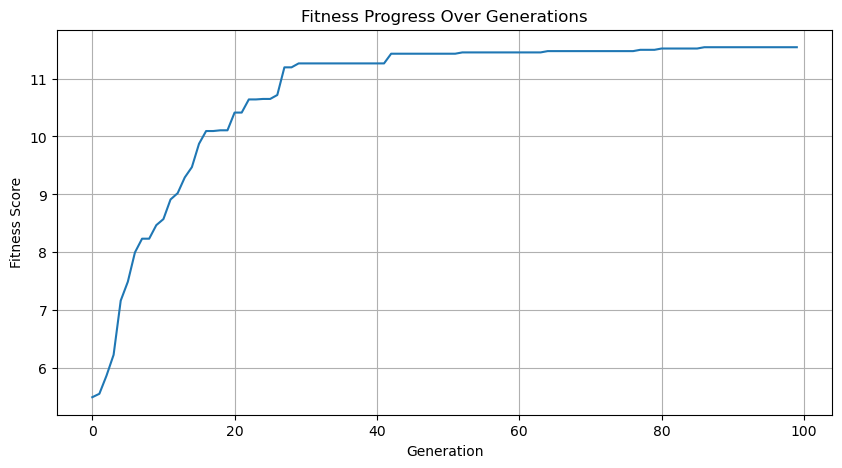

Optimization complete!


In [54]:
def run_genetic():
    # Example athlete metrics
    athlete_metrics = {
        'position': 'Defender',
        'chronic_workload': 300,
        'injury_history': 1,
        'current_fatigue': 4,
        'recovery_index': 6
    }

    try:
        # Load actions from file
        with open('defender_actions_realistic.txt', 'r') as f:
            content = f.read()
            # Find where the dictionary starts and ends
            dict_start = content.find('{')
            dict_end = content.rfind('}') + 1
            dict_str = content[dict_start:dict_end]

            print("Attempting to parse actions dictionary...")
            actions = ast.literal_eval(dict_str)
            print("Successfully parsed actions dictionary!")

            # Verify we have Defender data
            if 'Defender' not in actions:
                print("Error: 'Defender' key not found in actions dictionary")
                return

    except Exception as e:
        print(f"Error loading actions file: {e}")
        return

    # Initialize the optimizer
    print("Initializing optimizer...")
    optimizer = GeneticAthleteOptimizer(athlete_metrics, actions, position='Defender')

 # Run the genetic algorithm
    print("Running genetic algorithm...")
    best_schedule, fitness_history = optimizer.evolve()

    if not best_schedule:
        print("Error: No schedule was generated")
        return

    # Print results
    print("\n=== OPTIMIZED WEEKLY TRAINING SCHEDULE ===")
    print("(Balancing performance gains with injury risk)")
    print("Day | Activity          | Exercise               | Intensity | Duration")
    print("-" * 65)

    day_names = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
    for i, day in enumerate(best_schedule):
        if day[0] == 'train':
            _, category, exercise, intensity, duration = day
            print(f"{day_names[i]:<8} | Training ({category:<8}) | {exercise:<20} | {intensity}/5     | {duration} min")
        else:
            print(f"{day_names[i]:<8} | Recovery Day         | -                    | -        | -")

    # Calculate metrics
    perf_score = optimizer.predict_performance(best_schedule)
    injury_risk = optimizer.calculate_injury_risk(best_schedule)
    constraints = optimizer.check_constraints(best_schedule)

    print("\n=== SCHEDULE METRICS ===")
    print(f"Predicted Performance Gain: {perf_score:.2f} (higher is better)")
    print(f"Injury Risk Score: {injury_risk:.2f}/1.0 (lower is better)")
    print(f"Constraint Violations: {constraints:.2f} (0 is perfect)")

    # Show fitness progression
    print("\n=== GENETIC ALGORITHM PROGRESS ===")
    print(f"Initial Fitness: {fitness_history[0]:.2f}")
    print(f"Final Fitness: {fitness_history[-1]:.2f}")
    print(f"Improvement: {(fitness_history[-1] - fitness_history[0])/abs(fitness_history[0])*100:.1f}%")

    # Plot fitness over generations
    plt.figure(figsize=(10, 5))
    plt.plot(fitness_history)
    plt.title('Fitness Progress Over Generations')
    plt.xlabel('Generation')
    plt.ylabel('Fitness Score')
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    print("Starting genetic algorithm optimization...")
    run_genetic()
    print("Optimization complete!")
    

# Constraint Satisfaction Problem Algorithm

In [57]:
import json
import itertools
import heapq
from collections import defaultdict
from copy import copy
import time

# Load actions from file
with open("defender_actions_realistic.txt") as f:
    actions_data = f.read()
actions = eval(actions_data)["Defender"]  # If you're sure the data is safe; otherwise use json

# Extract all training sessions
def get_all_sessions(actions):
    sessions = []
    for category in actions:
        for subcategory in actions[category]:
            for level in actions[category][subcategory]:
                sessions.append((category, subcategory, level))
    return sessions

# Get the effects of a session
def get_session_effect(session, actions):
    category, subcategory, level = session
    return actions[category][subcategory][level]

# Scoring function
def session_score(effects):
    return (
        effects.get("tackles_won", 0)
        + effects.get("clearances", 0)
        + effects.get("passing_accuracy", 0)
        + effects.get("duels_won_percent", 0)
        - 2 * effects.get("errors_leading_to_shots_goals", 0)
    )

# Fatigue cost function
def session_fatigue(effects):
    return (
        effects.get("mental_fatigue", 0)
        + effects.get("training_load.session_intensity", 0)
    )

# Create possible session plans for a day (0, 1, or 2 sessions)
def generate_domain(sessions):
    domain = [()]  # rest day
    domain += [(s,) for s in sessions]
    domain += list(itertools.combinations(sessions, 2))
    return domain

# Evaluate full day plan
def evaluate_day(plan, actions):
    total_score = 0
    total_fatigue = 0
    for session in plan:
        effects = get_session_effect(session, actions)
        total_score += session_score(effects)
        total_fatigue += session_fatigue(effects)
    return total_score, total_fatigue

# CSP Optimizer Class
class OptimizedTrainingCSP:
    def __init__(self, variables, domains, max_fatigue=45):
        self.variables = variables
        self.domains = domains
        self.max_fatigue = max_fatigue
        self.best_solution = None
        self.best_score = -1

    def solve(self, timeout=30):
        start_time = time.time()
        counter = 0
        queue = []

        initial_state = {
            'assignment': {},
            'remaining': set(self.variables),
            'total_score': 0,
            'total_fatigue': 0,
            'categories': set()
        }
        heapq.heappush(queue, (-initial_state['total_score'], counter, initial_state))
        counter += 1

        while queue and (time.time() - start_time) < timeout:
            _, _, current = heapq.heappop(queue)

            if len(current['assignment']) == len(self.variables):
                if len(current['categories']) >= 3:
                    self.best_solution = current['assignment']
                    self.best_score = current['total_score']
                continue

            var = min(current['remaining'], key=lambda v: len(self.domains[v]))

            for value in self.domains[var]:
                new_assignment = dict(current['assignment'])
                new_assignment[var] = value

                day_score, day_fatigue = evaluate_day(value, actions)
                new_total_fatigue = current['total_fatigue'] + day_fatigue

                if new_total_fatigue > self.max_fatigue:
                    continue

                new_total_score = current['total_score'] + day_score
                new_categories = set(current['categories'])
                for session in value:
                    new_categories.add(session[0])

                new_state = {
                    'assignment': new_assignment,
                    'remaining': current['remaining'] - {var},
                    'total_score': new_total_score,
                    'total_fatigue': new_total_fatigue,
                    'categories': new_categories
                }

                heapq.heappush(queue, (-new_total_score, counter, new_state))
                counter += 1

        return self.best_solution

# Main execution
all_sessions = get_all_sessions(actions)
days = [f"Day{i}" for i in range(1, 8)]
domains = {day: generate_domain(all_sessions) for day in days}

csp = OptimizedTrainingCSP(days, domains, max_fatigue=45)
solution = csp.solve(timeout=30)

# Output results
output = ""
if solution:
    total_score = 0
    total_fatigue = 0
    for day in days:
        plan = solution[day]
        score, fatigue = evaluate_day(plan, actions)
        total_score += score
        total_fatigue += fatigue
        output += f"{day}:\n"
        for session in plan:
            output += f"  - {session[1]} (Level {session[2]}) in {session[0]}\n"
        output += f"    Score: {score:.2f}, Fatigue: {fatigue:.2f}\n"
    output += f"\nTotal Score: {total_score:.2f}\n"
    output += f"Total Fatigue: {total_fatigue:.2f}"
else:
    output = "No solution found within time limit."

print(output)


Day1:
  - 1v1_Defending (Level 5) in Defensive_Drills
  - Aerial_Clearances (Level 5) in Functional_Training
    Score: 32.27, Fatigue: 10.68
Day2:
  - 1v1_Defending (Level 5) in Defensive_Drills
  - Marking_Tackling (Level 5) in Defensive_Drills
    Score: 32.78, Fatigue: 11.43
Day3:
  - Ice_Baths (Level 5) in Recovery_Regeneration
  - Mid_Block (Level 4) in Game_Model_Implementation
    Score: 21.38, Fatigue: 1.65
Day4:
    Score: 0.00, Fatigue: 0.00
Day5:
  - 1v1_Defending (Level 5) in Defensive_Drills
  - Marking_Tackling (Level 5) in Defensive_Drills
    Score: 32.78, Fatigue: 11.43
Day6:
  - 1v1_Defending (Level 5) in Defensive_Drills
  - Marking_Tackling (Level 5) in Defensive_Drills
    Score: 32.78, Fatigue: 11.43
Day7:
  - Dynamic_Stretching (Level 5) in WarmUp&Mobility
  - Ice_Baths (Level 5) in Recovery_Regeneration
    Score: 23.58, Fatigue: -5.09

Total Score: 175.57
Total Fatigue: 41.53
